# MetaboliQ AI
## ~ by Mavericks
### Functionality 2
This Jupyter Notebook contains the *Decision Tree Classifier Model* for the second functionality of MetaboliQ AI.  
Problem Statement: Predicting Diabetes risk based on lifestyle of common masses.  
  
Developed for:  
Individuals  
Output: Predicts 0 for healthy living and 1 for predicted diabetes.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Exploratory Data Analysis

In [5]:
data.shape

(253680, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Statistical Analysis

In [9]:
data.mean()

Diabetes_binary          0.139333
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
HeartDiseaseorAttack     0.094186
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64

In [10]:
data.median()

Diabetes_binary          0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
dtype: float64

In [11]:
data.var()

Diabetes_binary          0.119920
HighBP                   0.244960
HighChol                 0.244243
CholCheck                0.035937
BMI                     43.674839
Smoker                   0.246771
Stroke                   0.038925
HeartDiseaseorAttack     0.085315
PhysActivity             0.184186
Fruits                   0.231976
Veggies                  0.153018
HvyAlcoholConsump        0.053039
AnyHealthcare            0.046552
NoDocbcCost              0.077091
GenHlth                  1.141644
MentHlth                54.950296
PhysHlth                76.002675
DiffWalk                 0.139925
Sex                      0.246442
Age                      9.328262
Education                0.971751
Income                   4.289652
dtype: float64

In [12]:
data.std()

Diabetes_binary         0.346294
HighBP                  0.494934
HighChol                0.494210
CholCheck               0.189571
BMI                     6.608694
Smoker                  0.496761
Stroke                  0.197294
HeartDiseaseorAttack    0.292087
PhysActivity            0.429169
Fruits                  0.481639
Veggies                 0.391175
HvyAlcoholConsump       0.230302
AnyHealthcare           0.215759
NoDocbcCost             0.277654
GenHlth                 1.068477
MentHlth                7.412847
PhysHlth                8.717951
DiffWalk                0.374066
Sex                     0.496429
Age                     3.054220
Education               0.985774
Income                  2.071148
dtype: float64

In [14]:
data.cov()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,0.119920,0.045098,0.034276,0.004251,0.496257,0.010457,0.007230,0.017932,-0.017557,-0.006802,...,0.001215,0.003022,0.108623,0.177934,0.517262,0.028284,0.005403,0.187673,-0.042485,-0.117567
HighBP,0.045098,0.244960,0.072940,0.009243,0.699142,0.023847,0.012653,0.030266,-0.026608,-0.009667,...,0.004103,0.002385,0.158928,0.207130,0.695598,0.041400,0.012827,0.520688,-0.068968,-0.175530
HighChol,0.034276,0.072940,0.244243,0.008024,0.348563,0.022414,0.009031,0.026094,-0.016554,-0.009726,...,0.004503,0.001826,0.110060,0.227390,0.524562,0.026745,0.007656,0.411044,-0.034493,-0.087475
CholCheck,0.004251,0.009243,0.008024,0.035937,0.043216,-0.000935,0.000904,0.002448,0.000341,0.002178,...,0.004811,-0.003066,0.009437,-0.011756,0.052513,0.002878,-0.002081,0.052295,0.000282,0.005598
BMI,0.496257,0.699142,0.348563,0.043216,43.674839,0.045319,0.026276,0.102122,-0.417761,-0.278571,...,-0.026337,0.106804,1.688945,4.179280,6.979457,0.487193,0.140909,-0.739105,-0.677084,-1.369699
Smoker,0.010457,0.023847,0.022414,-0.000935,0.045319,0.246771,0.005995,0.016605,-0.018633,-0.018582,...,-0.002492,0.006751,0.086593,0.339505,0.504356,0.022756,0.023098,0.183039,-0.079308,-0.127515
Stroke,0.007230,0.012653,0.009031,0.000904,0.026276,0.005995,0.038925,0.011698,-0.005855,-0.001272,...,0.000374,0.001907,0.037511,0.102627,0.256184,0.013031,0.000292,0.076512,-0.014783,-0.052549
HeartDiseaseorAttack,0.017932,0.030266,0.026094,0.002448,0.102122,0.016605,0.011698,0.085315,-0.010943,-0.002784,...,0.001181,0.002514,0.080639,0.139918,0.462675,0.023241,0.012484,0.197705,-0.028678,-0.085306
PhysActivity,-0.017557,-0.026608,-0.016554,0.000341,-0.417761,-0.018633,-0.005855,-0.010943,0.184186,0.029508,...,0.003288,-0.007345,-0.122061,-0.399538,-0.820242,-0.040644,0.006920,-0.121261,0.084468,0.176476
Fruits,-0.006802,-0.009667,-0.009726,0.002178,-0.278571,-0.018582,-0.001272,-0.002784,0.029508,0.231976,...,0.003278,-0.005917,-0.053445,-0.243558,-0.187411,-0.008711,-0.021800,0.094951,0.052315,0.079733


In [15]:
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


## Outlier Detection and Removal

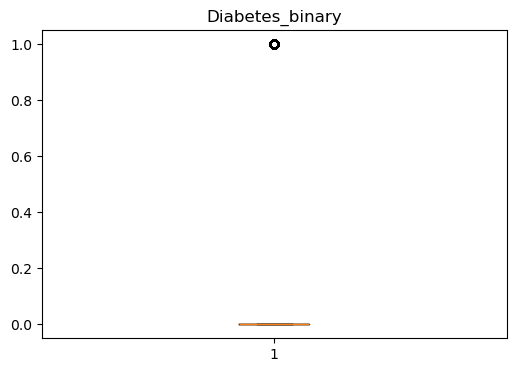

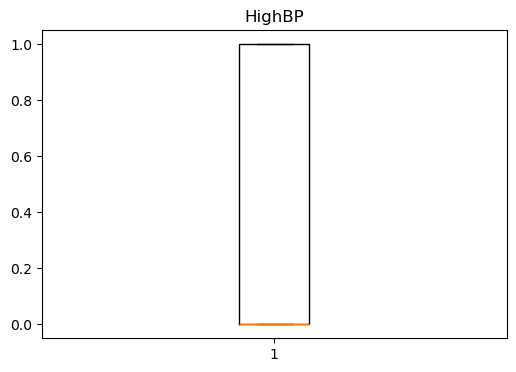

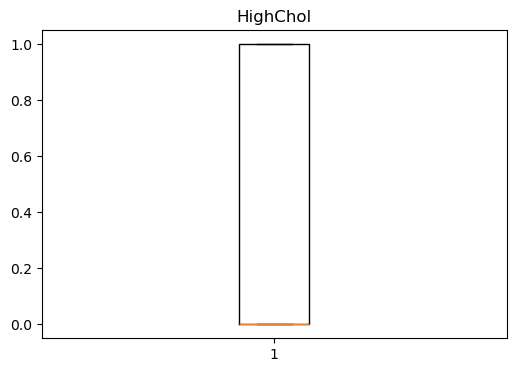

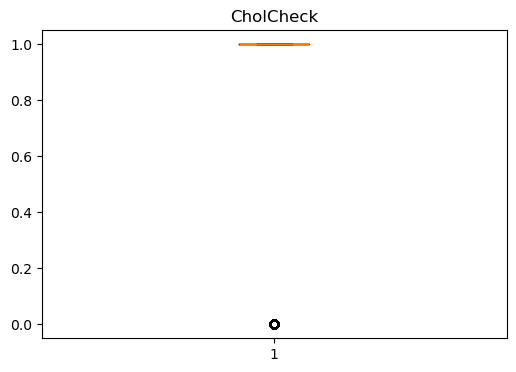

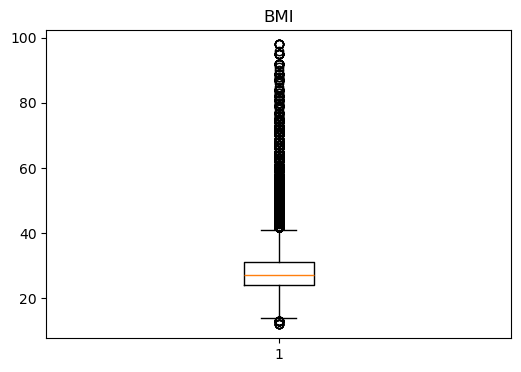

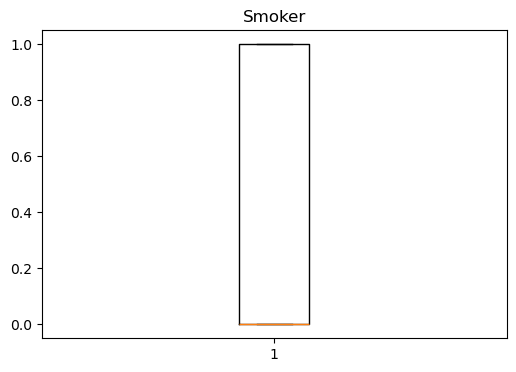

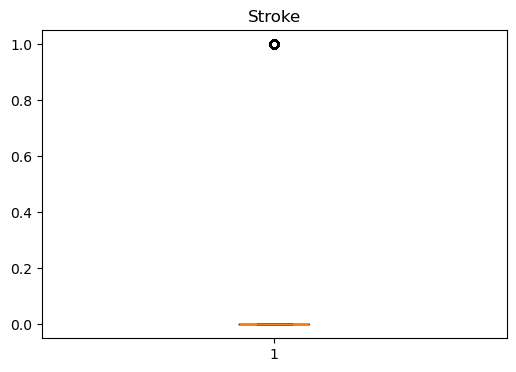

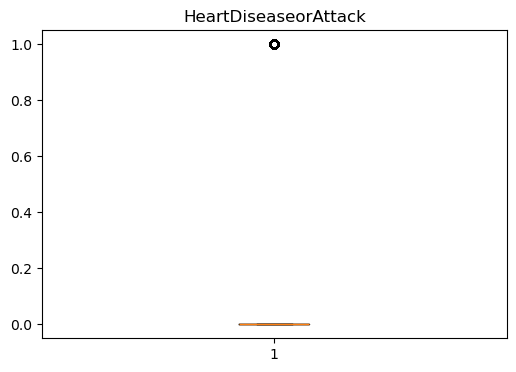

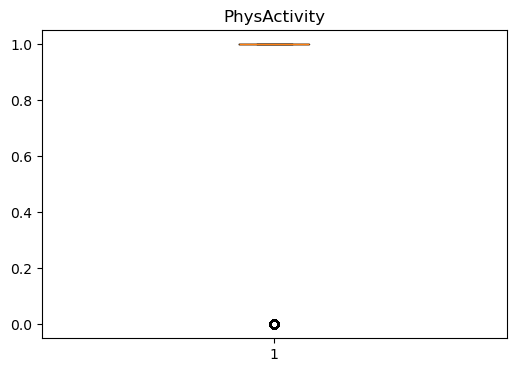

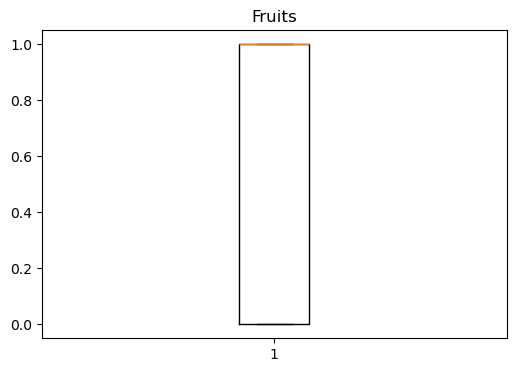

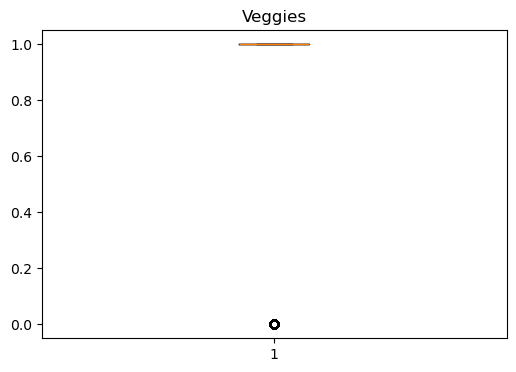

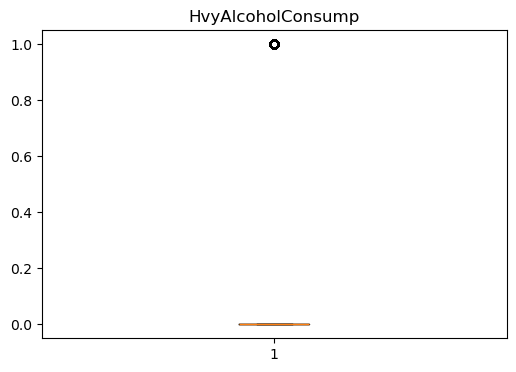

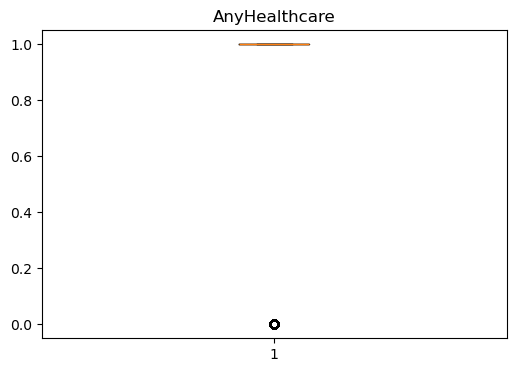

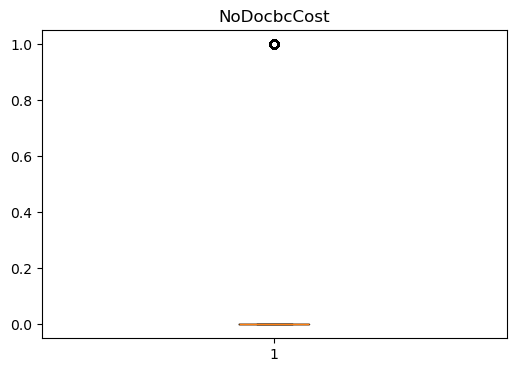

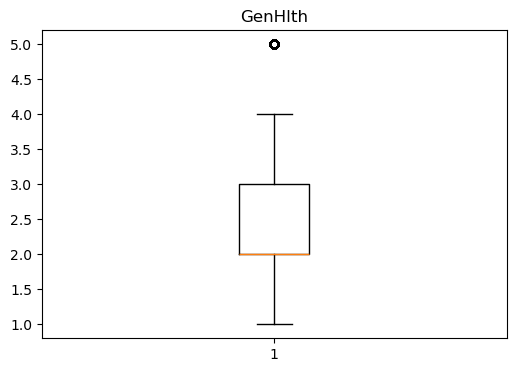

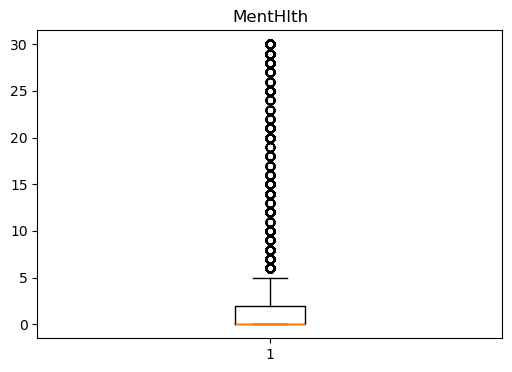

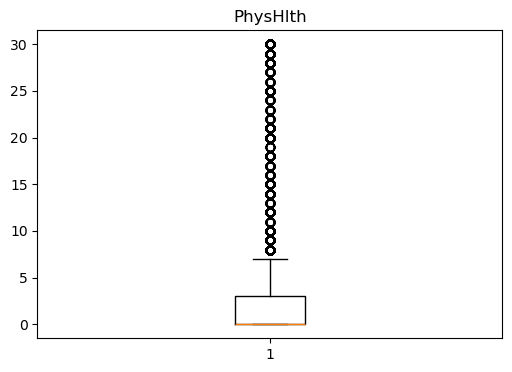

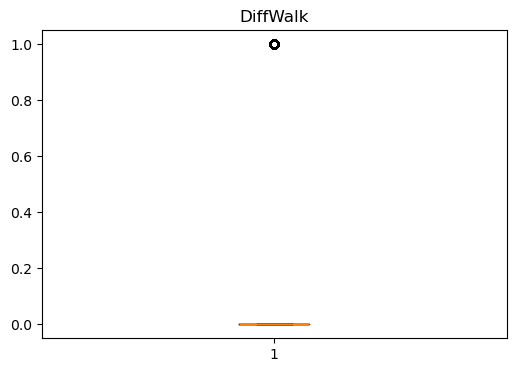

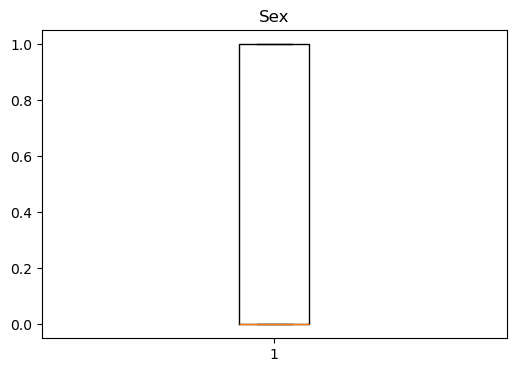

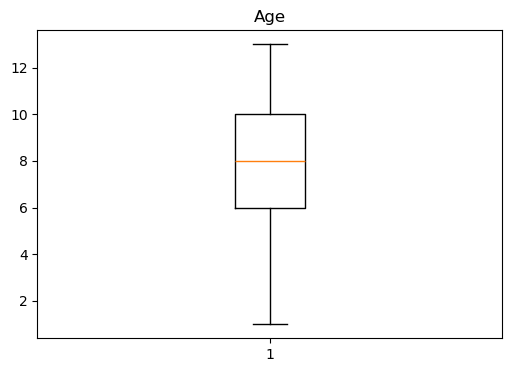

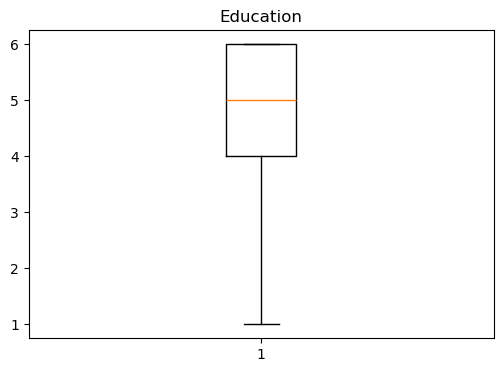

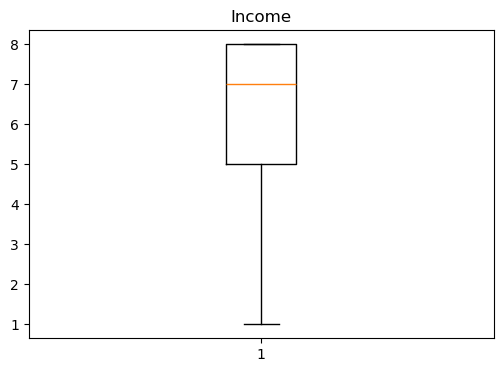

<Figure size 640x480 with 0 Axes>

In [18]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

In [19]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Calculate Quartile Deviation
quartile_deviation = (Q3 - Q1) / 2

print("Interquartile Range (IQR):", IQR)
print("Quartile Deviation:", quartile_deviation)

Interquartile Range (IQR): 1.0
Quartile Deviation: 0.5


Hence, no problematic outliers are present.

# Data Visualization

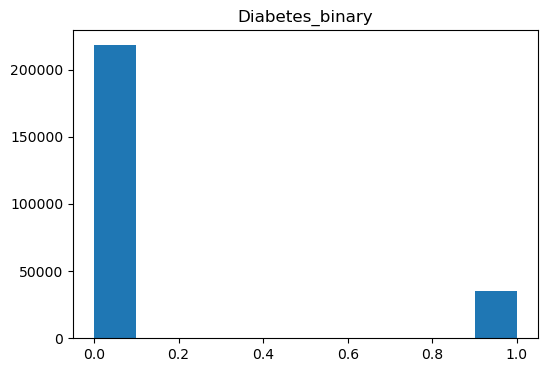

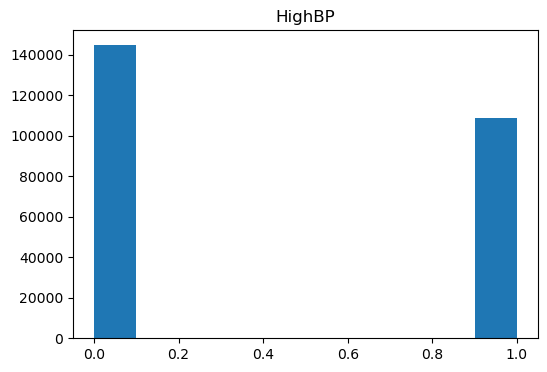

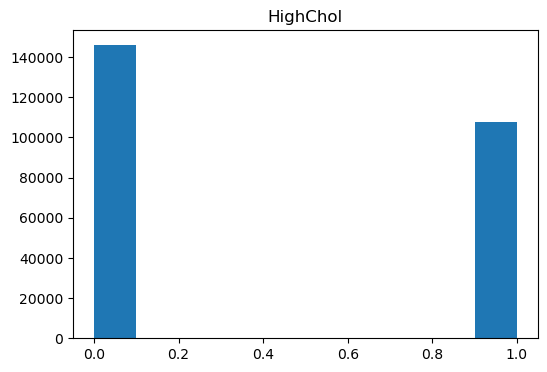

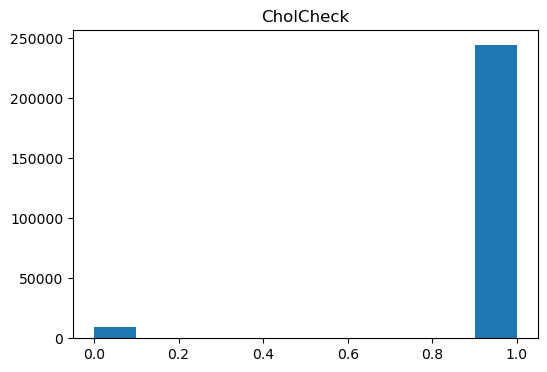

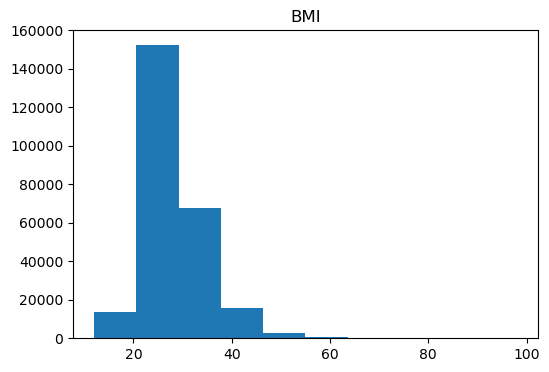

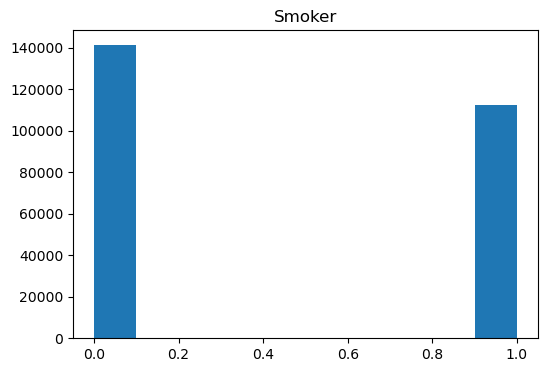

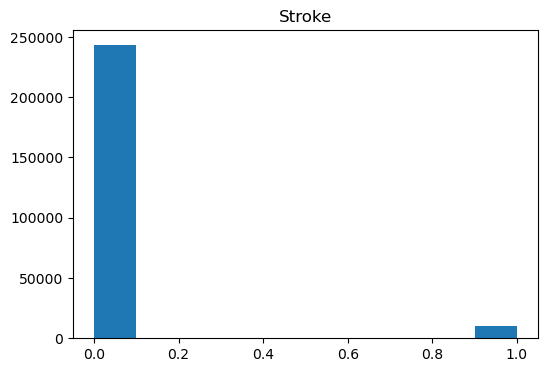

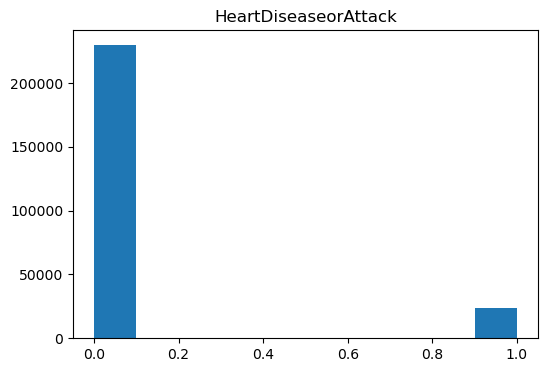

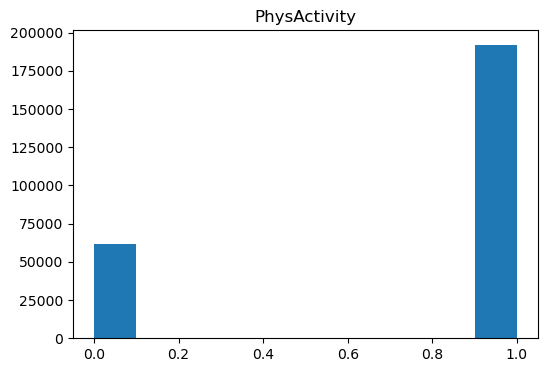

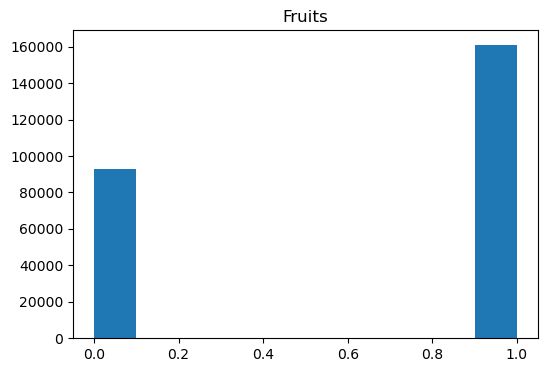

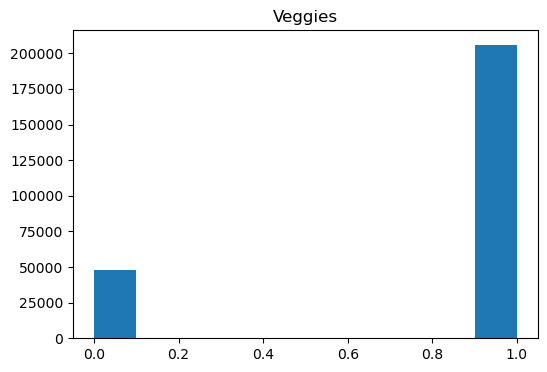

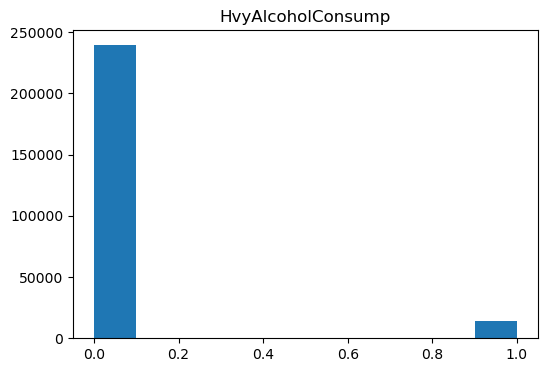

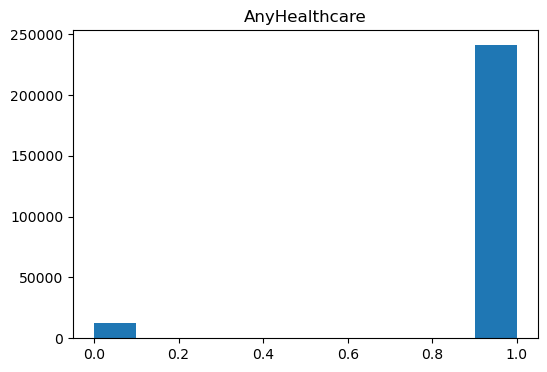

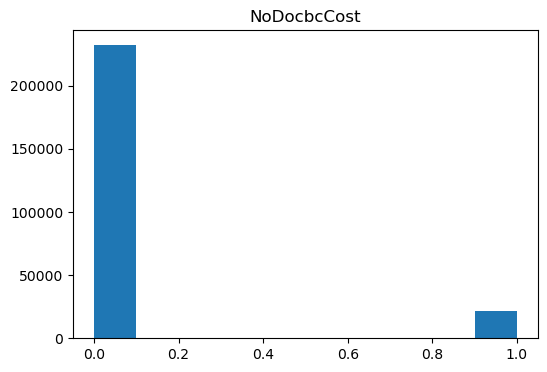

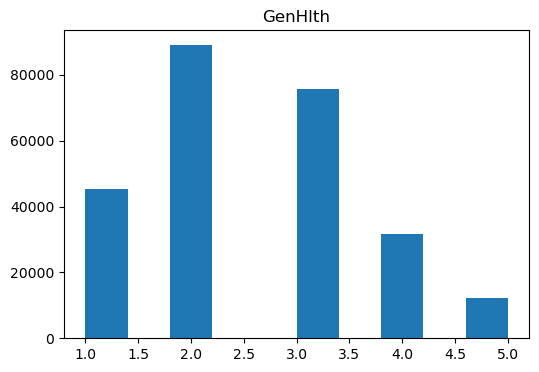

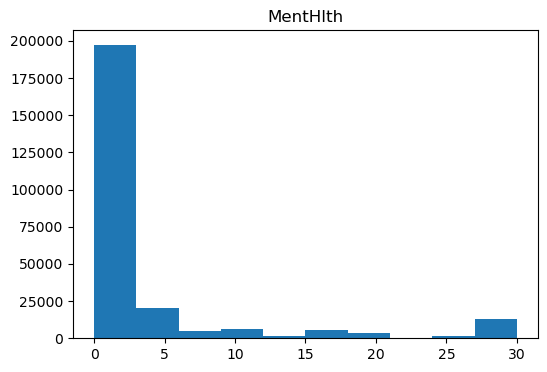

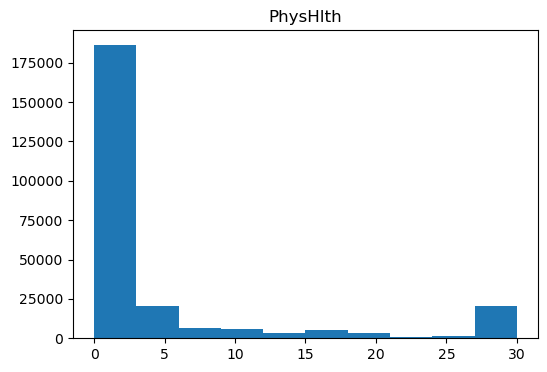

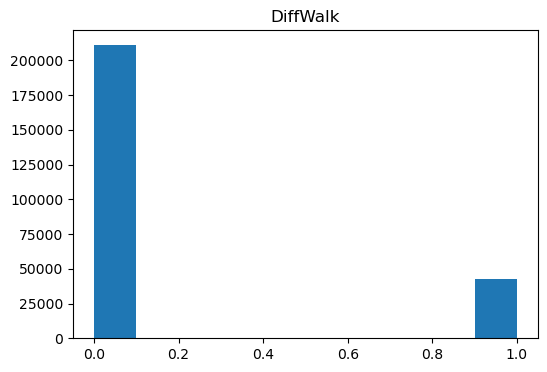

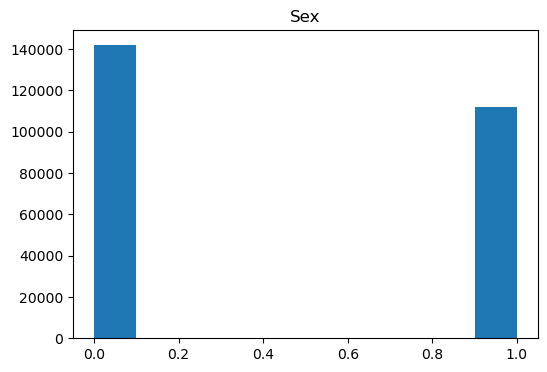

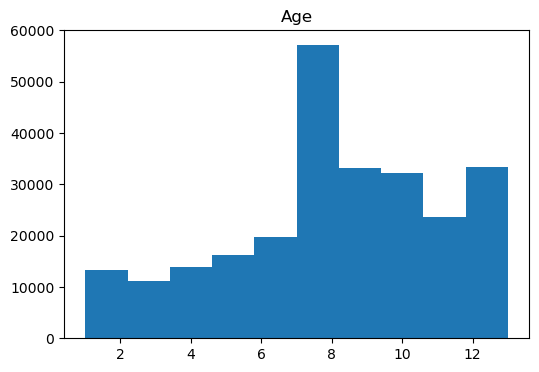

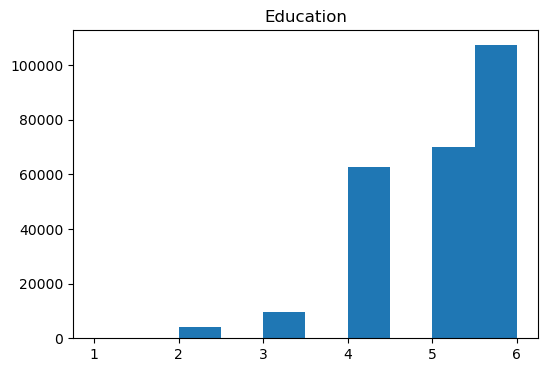

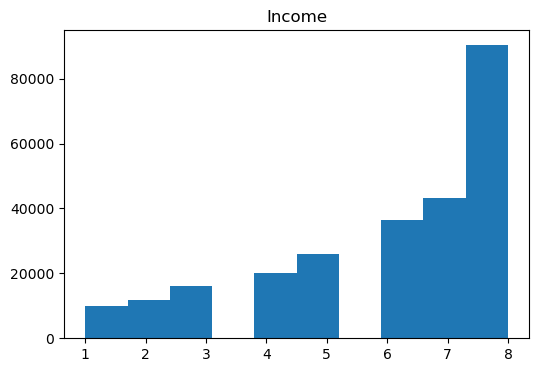

<Figure size 640x480 with 0 Axes>

In [20]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

<Axes: >

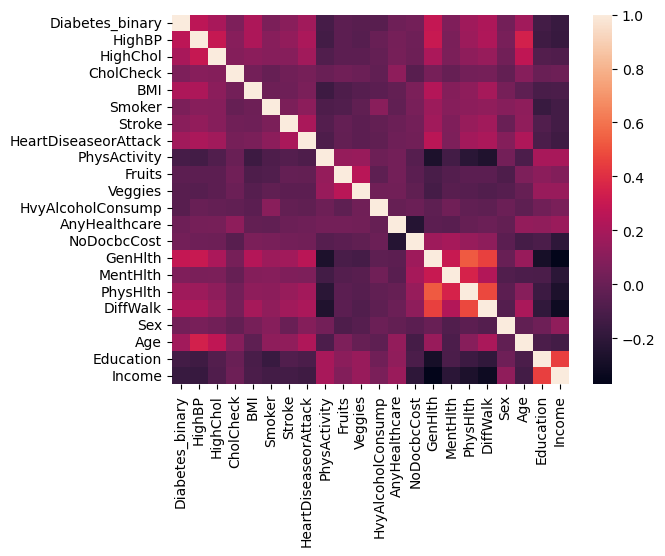

In [22]:
sns.heatmap(data.corr())

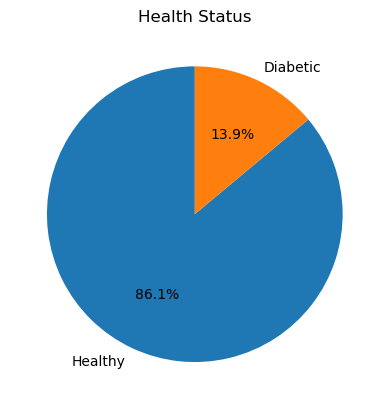

In [31]:
labels = ['Healthy', 'Diabetic']
counts = [list(data["Diabetes_binary"]).count(0), list(data["Diabetes_binary"]).count(1)]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Health Status')
plt.show()

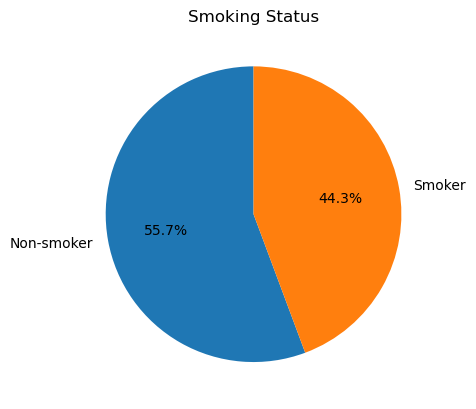

In [33]:
labels = ['Non-smoker', 'Smoker']
counts = [list(data["Smoker"]).count(0), list(data["Smoker"]).count(1)]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Smoking Status')
plt.show()

# Model Building

In [34]:
features = data[["Age", "Sex", "BMI", "Smoker", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack",
"PhysActivity", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth"]].copy()

In [35]:
target = data[["Diabetes_binary"]].copy()

In [36]:
#Creating the features(X) and target(y) variables.
X = features
y = target

In [37]:
#Standard train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#DTC Model training
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [39]:
#Model Testing
y_pred = model.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [40]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8650070955534531

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.16      0.24      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



In [44]:
questions = ['Age', 'Sex', 'BMI', 'Smoker', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth']
answers = []
print("Please enter the following details: ")
for i in questions:
    print(i, ": ", end="")
    temp = float(input())
    answers.append(temp)

report = {}

for key in questions:
    for value in answers:
        report[key] = value
        answers.remove(value)
        break

#print(report)

Please enter the following details: 
Age : 

 19


Sex : 

 1


BMI : 

 24


Smoker : 

 0


HighBP : 

 0


HighChol : 

 0


Stroke : 

 0


HeartDiseaseorAttack : 

 0


PhysActivity : 

 1


HvyAlcoholConsump : 

 0


GenHlth : 

 0


MentHlth : 

 0


PhysHlth : 

 0


In [45]:
# Convert dictionary(report) to DataFrame(patient_df)
patient_df = pd.DataFrame([report])

# Make a prediction
prediction = model.predict(patient_df)

# Display the result
if prediction[0] == 1:
    print("The patient is diabetic.")
else:
    print("The patient is not diabetic.")

The patient is not diabetic.


In [24]:
from joblib import dump
dump(model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [ ]:
# Terminated